**HW4**

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn import metrics
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# A) Importing (Loading) the Dataset:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# B) Preprocessing the data:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

nb_classes=10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)




In [4]:
# C) Building The Model:

# ----- Set up the layers ------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


# ------ Compile the model ------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])






In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [6]:
# D) Training the model

history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=256, epochs=10)

Epoch 1/10
157/157 [==============================] - 299s 2s/step - loss: 1.8917 - accuracy: 0.2930 - val_loss: 1.7807 - val_accuracy: 0.3652
Epoch 2/10
157/157 [==============================] - 288s 2s/step - loss: 1.4621 - accuracy: 0.4634 - val_loss: 1.2351 - val_accuracy: 0.5526
Epoch 3/10
157/157 [==============================] - 288s 2s/step - loss: 1.2010 - accuracy: 0.5706 - val_loss: 1.0695 - val_accuracy: 0.6213
Epoch 4/10
157/157 [==============================] - 290s 2s/step - loss: 1.0529 - accuracy: 0.6293 - val_loss: 0.9908 - val_accuracy: 0.6479
Epoch 5/10
157/157 [==============================] - 287s 2s/step - loss: 0.9411 - accuracy: 0.6670 - val_loss: 0.8478 - val_accuracy: 0.7035
Epoch 6/10
157/157 [==============================] - 287s 2s/step - loss: 0.8591 - accuracy: 0.6985 - val_loss: 0.8428 - val_accuracy: 0.6991
Epoch 7/10
157/157 [==============================] - 286s 2s/step - loss: 0.8038 - accuracy: 0.7161 - val_loss: 0.7787 - val_accuracy: 0.7263

In [7]:
# E) Making prediction on test set.

y_pred = model.predict(X_test)
y_true = np.argmax(Y_test, axis=1)
y_predicted = np.argmax(y_pred, axis=1)

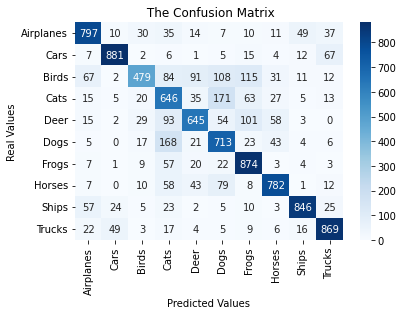

The precision:  76.2735814763573
The Recall:  75.32
The accuracy:  75.32

Classification Report

              precision    recall  f1-score   support

   Airplanes       0.80      0.80      0.80      1000
        Cars       0.90      0.88      0.89      1000
       Birds       0.79      0.48      0.60      1000
        Cats       0.54      0.65      0.59      1000
        Deer       0.74      0.65      0.69      1000
        Dogs       0.61      0.71      0.66      1000
       Frogs       0.71      0.87      0.78      1000
      Horses       0.81      0.78      0.79      1000
       Ships       0.89      0.85      0.87      1000
      Trucks       0.83      0.87      0.85      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



In [8]:
# F) Evaluating model performance on test set:


# -------- Plotting confusion matrix for each class -------------

CN = metrics.confusion_matrix(y_true, y_predicted)

indices = ['Airplanes', 'Cars', 'Birds', 'Cats', 'Deer', 'Dogs', 'Frogs', 'Horses', 'Ships', 'Trucks'] 
c = ['Airplanes', 'Cars', 'Birds', 'Cats', 'Deer', 'Dogs', 'Frogs', 'Horses', 'Ships', 'Trucks']

CN_dataframe = pd.DataFrame(CN, indices, c)

sns.heatmap(CN_dataframe, annot=True, fmt='d', cmap='Blues')
plt.title(' The Confusion Matrix')
plt.ylabel('Real Values')
plt.xlabel('Predicted Values')
plt.show()

# -------- The precision --------
precision= metrics.precision_score(y_true, y_predicted, average='weighted')

# -------- The Recall --------
recall = metrics.recall_score(y_true, y_predicted, average='weighted')

# -------- The Accuracy  --------
accuracy = metrics.accuracy_score(y_true, y_predicted)

print("The precision: ", precision*100)
print("The Recall: ", recall*100)
print("The accuracy: ", accuracy*100)

#precision, recall and f1-score for each class
print('\nClassification Report\n')
print(metrics.classification_report(y_true, y_predicted, target_names=['Airplanes', 'Cars', 'Birds', 'Cats', 'Deer', 'Dogs', 'Frogs', 'Horses', 'Ships', 'Trucks']))